PURPOSE OF CODE



In [156]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
df=pd.read_csv('data/test-calculated.csv',sep="\t")
df = df.drop('Unnamed: 0', 1)
df.head(n=100)
resultFile = open("result.txt", "a")
resultFile.write("\n"+df.error.describe().to_string()+"\n")


0    0.0
1    0.0
2    0.0
3    0.5
4    0.0
Name: error, dtype: float64

In [157]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
        
def draw (tmpdf,title):
    resultFile.write("\n"+"\n"+title)
    res=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
    xlabel=[0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75]
    data=[]
    for x in range(0,len(res)-1):
        tmp=tmpdf.between(res[x],res[x+1]-0.00001)
        tmpcount=tmp.sum()
        data.append(tmpcount)
        line=""
        for y in range(0,int(tmpcount/500)):
            line+="|"
        resultFile.write("\n"+str(res[x])+"-"+str(res[x+1])+"\t"+str(tmpcount)+"\t"+line)
    %matplotlib inline
    plt.plot(xlabel,data)
    plt.title(title)

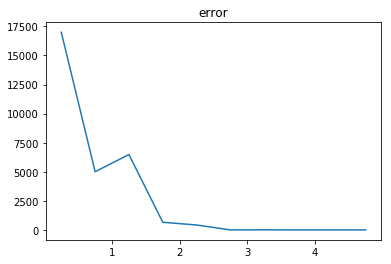

In [158]:
draw(df.error,"error")

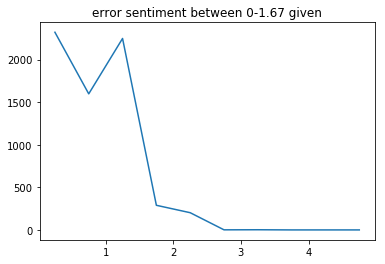

In [159]:
tmplist=df.Sentiment.between(0,1.669)
tmpdf=df.error[tmplist]
draw(tmpdf,"error sentiment between 0-1.67 given")

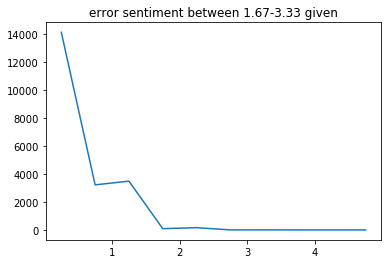

In [160]:
tmplist=df.Sentiment.between(1.67,3.329)
tmpdf=df.error[tmplist]
draw(tmpdf,"error sentiment between 1.67-3.33 given")

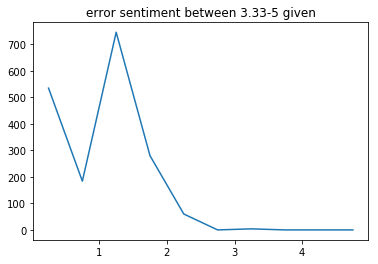

In [161]:
tmplist=df.Sentiment.between(3.33,5)
tmpdf=df.error[tmplist]
draw(tmpdf,"error sentiment between 3.33-5 given")

In [162]:
resultFile.write("\n---------------------------------")

34

In [163]:
resultFile.close()